# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 606
['Rabaul', 'Edinburgh of the seven seas', 'Kaiapoi', 'Bethel', 'Jamestown', 'Yellowknife', 'Georgetown', 'Hobyo', 'Taibet', 'Carolina beach', 'Prado', 'Grytviken', 'Codrington', 'Tolanaro', 'Taoudenni', 'Petropavlovsk-kamchatsky', 'Waitangi', 'Tiksi', 'Kununurra', 'Port-aux-francais', 'Suva', 'Avarua', 'Dhidhdhoo', 'Popondetta', 'Al jawf', 'Kuala belait', 'Hillsdale', 'Micheweni', 'Nova sintra', 'Dudinka', 'Qui nhon', 'Talnakh', 'Sanctuary point', 'Albany', 'Al ghayzah', 'Xinyuan', 'Hithadhoo', 'Trapani', 'Nuuk', 'Port mathurin', 'Olonkinbyen', 'Papatowai', 'Mount isa', 'Nova olinda do norte', 'Cole harbour', 'Vingt cinq', 'Acapulco de juarez', 'Iskateley', 'Hawaiian paradise park', 'Isafjordur', 'Blackmans bay', 'Hermanus', 'Atafu village', 'Klyuchi', 'Hami', 'Quthing', 'Cabo san lucas', 'Chongwe', "Hayma'", 'Gordonvale', 'Iqaluit', 'Amarante do maranhao', 'Samraong', 'Tongchuanshi', 'Monrovia', 'Chonchi', 'Port lincoln', 'West island', "Nar'yan-mar",

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [14]:
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | Rabaul
City not found. Skipping...
Processing Record 2 of Set 1 | Edinburgh of the seven seas
City not found. Skipping...
Processing Record 3 of Set 1 | Kaiapoi
City not found. Skipping...
Processing Record 4 of Set 1 | Bethel
City not found. Skipping...
Processing Record 5 of Set 1 | Jamestown
City not found. Skipping...
Processing Record 6 of Set 1 | Yellowknife
City not found. Skipping...
Processing Record 7 of Set 1 | Georgetown
City not found. Skipping...
Processing Record 8 of Set 1 | Hobyo
City not found. Skipping...
Processing Record 9 of Set 1 | Taibet
City not found. Skipping...
Processing Record 10 of Set 1 | Carolina beach
City not found. Skipping...
Processing Record 11 of Set 1 | Prado
City not found. Skipping...
Processing Record 12 of Set 1 | Grytviken
City not found. Skipping...
Processing Record 13 of Set 1 | Codrington
City not found. Skipping...
Processing Record 14 of Set 1 | Tolanaro
City not found. Skipping...
Processing Record 15 o

City not found. Skipping...
Processing Record 17 of Set 3 | Aral
City not found. Skipping...
Processing Record 18 of Set 3 | Gantang
City not found. Skipping...
Processing Record 19 of Set 3 | Kawthoung
City not found. Skipping...
Processing Record 20 of Set 3 | Greymouth
City not found. Skipping...
Processing Record 21 of Set 3 | Puerto natales
City not found. Skipping...
Processing Record 22 of Set 3 | Poso
City not found. Skipping...
Processing Record 23 of Set 3 | Port elizabeth
City not found. Skipping...
Processing Record 24 of Set 3 | Pasni
City not found. Skipping...
Processing Record 25 of Set 3 | Punta arenas
City not found. Skipping...
Processing Record 26 of Set 3 | Alice springs
City not found. Skipping...
Processing Record 27 of Set 3 | Remire-montjoly
City not found. Skipping...
Processing Record 28 of Set 3 | Murashi
City not found. Skipping...
Processing Record 29 of Set 3 | Oyama
City not found. Skipping...
Processing Record 30 of Set 3 | Portland
City not found. Skip

City not found. Skipping...
Processing Record 39 of Set 5 | Port saint john's
City not found. Skipping...
Processing Record 40 of Set 5 | Repentigny
City not found. Skipping...
Processing Record 41 of Set 5 | Undurkhaan
City not found. Skipping...
Processing Record 42 of Set 5 | San antonio de pale
City not found. Skipping...
Processing Record 43 of Set 5 | Saint-laurent-du-maroni
City not found. Skipping...
Processing Record 44 of Set 5 | Hammerfest
City not found. Skipping...
Processing Record 45 of Set 5 | Montepuez
City not found. Skipping...
Processing Record 46 of Set 5 | Fuvahmulah
City not found. Skipping...
Processing Record 47 of Set 5 | El dorado
City not found. Skipping...
Processing Record 48 of Set 5 | Dunedin
City not found. Skipping...
Processing Record 49 of Set 5 | Heniches'k
City not found. Skipping...
Processing Record 0 of Set 6 | Essaouira
City not found. Skipping...
Processing Record 1 of Set 6 | Miyanoura
City not found. Skipping...
Processing Record 2 of Set 6 

City not found. Skipping...
Processing Record 7 of Set 8 | Newport
City not found. Skipping...
Processing Record 8 of Set 8 | Whitehorse
City not found. Skipping...
Processing Record 9 of Set 8 | Mount pearl
City not found. Skipping...
Processing Record 10 of Set 8 | Taldykorgan
City not found. Skipping...
Processing Record 11 of Set 8 | Veinticinco de mayo
City not found. Skipping...
Processing Record 12 of Set 8 | Istgah-e rah ahan-e garmsar
City not found. Skipping...
Processing Record 13 of Set 8 | Lethbridge
City not found. Skipping...
Processing Record 14 of Set 8 | Tvoroyri
City not found. Skipping...
Processing Record 15 of Set 8 | Polyarnyy
City not found. Skipping...
Processing Record 16 of Set 8 | Lakhipur
City not found. Skipping...
Processing Record 17 of Set 8 | Sarmiento
City not found. Skipping...
Processing Record 18 of Set 8 | Rio grande
City not found. Skipping...
Processing Record 19 of Set 8 | Horta
City not found. Skipping...
Processing Record 20 of Set 8 | Krasny

City not found. Skipping...
Processing Record 25 of Set 10 | Zaozersk
City not found. Skipping...
Processing Record 26 of Set 10 | Gorodishche
City not found. Skipping...
Processing Record 27 of Set 10 | Fortaleza
City not found. Skipping...
Processing Record 28 of Set 10 | Antofagasta
City not found. Skipping...
Processing Record 29 of Set 10 | El bauga
City not found. Skipping...
Processing Record 30 of Set 10 | Outapi
City not found. Skipping...
Processing Record 31 of Set 10 | Pudasjarvi
City not found. Skipping...
Processing Record 32 of Set 10 | Garbahaarrey
City not found. Skipping...
Processing Record 33 of Set 10 | Callao
City not found. Skipping...
Processing Record 34 of Set 10 | Raton
City not found. Skipping...
Processing Record 35 of Set 10 | Mchinji
City not found. Skipping...
Processing Record 36 of Set 10 | El quebrachal
City not found. Skipping...
Processing Record 37 of Set 10 | Rawson
City not found. Skipping...
Processing Record 38 of Set 10 | Dan khun thot
City no

City not found. Skipping...
Processing Record 44 of Set 12 | Albertina
City not found. Skipping...
Processing Record 45 of Set 12 | Douz
City not found. Skipping...
Processing Record 46 of Set 12 | Chimoio
City not found. Skipping...
Processing Record 47 of Set 12 | Kayyerkan
City not found. Skipping...
Processing Record 48 of Set 12 | Rongelap
City not found. Skipping...
Processing Record 49 of Set 12 | Sao tome
City not found. Skipping...
Processing Record 0 of Set 13 | Sidi khaled
City not found. Skipping...
Processing Record 1 of Set 13 | Cachoeiro de itapemirim
City not found. Skipping...
Processing Record 2 of Set 13 | Gamba
City not found. Skipping...
Processing Record 3 of Set 13 | Mimoso do sul
City not found. Skipping...
Processing Record 4 of Set 13 | Broome
City not found. Skipping...
Processing Record 5 of Set 13 | Illizi
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rabaul,-4.1967,152.1721,300.68,76,58,1.09,PG,1714253995
1,Edinburgh of the seven seas,-37.0676,-12.3116,285.59,71,98,12.48,SH,1714253899
2,Kaiapoi,-43.3783,172.6401,289.57,77,9,1.03,NZ,1714253995
3,Bethel,41.3712,-73.4140,288.26,37,0,6.17,US,1714253807
4,Jamestown,42.0970,-79.2353,291.88,71,99,5.81,US,1714253904


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rabaul,-4.1967,152.1721,300.68,76,58,1.09,PG,1714253995
1,Edinburgh of the seven seas,-37.0676,-12.3116,285.59,71,98,12.48,SH,1714253899
2,Kaiapoi,-43.3783,172.6401,289.57,77,9,1.03,NZ,1714253995
3,Bethel,41.3712,-73.4140,288.26,37,0,6.17,US,1714253807
4,Jamestown,42.0970,-79.2353,291.88,71,99,5.81,US,1714253904


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

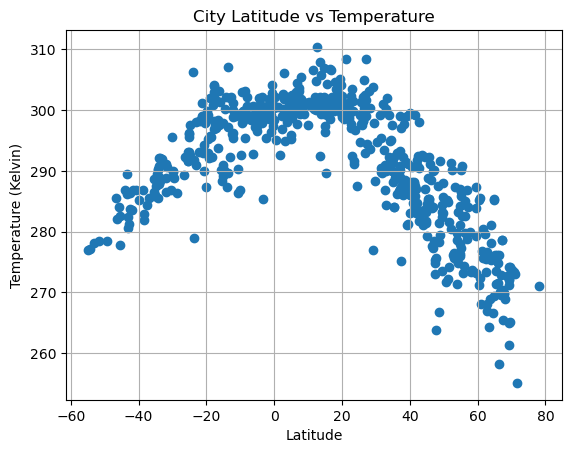

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

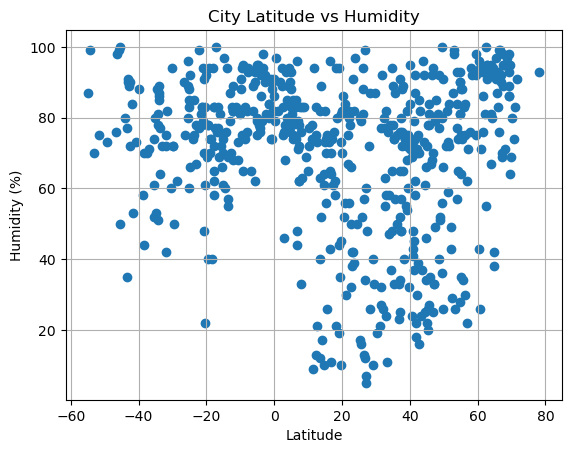

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

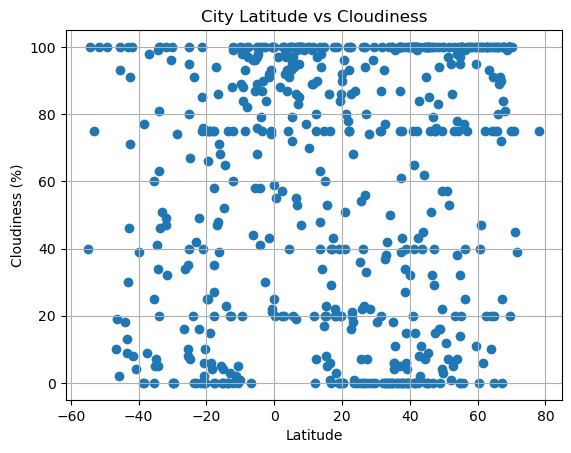

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

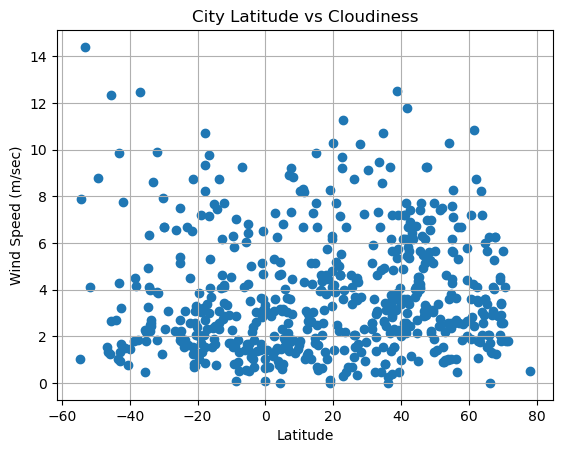

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE